In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import requests
import torch
import torchvision
import torchviz
from PIL import Image
from torchvision import models, transforms

# Á¨¨1Á´†„ÄÄÁîªÂÉèÂàÜÈ°û„Å®Ëª¢ÁßªÂ≠¶Áøí(VGG)

## 1-1 Â≠¶ÁøíÊ∏à„Åø„ÅÆVGG„É¢„Éá„É´„Çí‰ΩøÁî®„Åô„ÇãÊñπÊ≥ï

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.1


#### model„Å∏„ÅÆweightsÂºïÊï∞„ÅÆÂÄ§

‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´„ÄÅ`pretrained=True`„Å®„Åó„Å¶Â≠¶ÁøíÊ∏à„Åø„ÅÆ„É¢„Éá„É´„ÇíË™≠„ÅøËæº„Çì„Åß„ÅÑ„Åü„ÄÇ

```python
models.vgg16(pretrained=True)
```

„Åó„Åã„Åó„Å™„Åå„Çâ„ÄÅ[ÂÖ¨Âºè„Éâ„Ç≠„É•„É°„É≥„Éà](https://pytorch.org/vision/stable/models.html)„Å´Êõ∏„Åã„Çå„Å¶„ÅÑ„ÇãÈÄö„Çä„ÄÅ`pretrained`ÂºïÊï∞„ÅØdeprecated„Å´„Å™„Å£„Å¶„Åä„Çä„ÄÅv0.15„ÅßÂªÉÊ≠¢‰∫àÂÆö„Åß„ÅÇ„Çã(ÂÆüÈöõ„Å´„ÅØv0.15„Åß„ÇÇ`pretrained`ÂºïÊï∞„ÅØ‰ΩøÁî®ÂèØËÉΩ„Å®„Å™„Å£„Å¶„ÅÑ„Çã)„ÄÇ
„Åì„Çå„ÅØ„ÄÅÂ≠¶ÁøíÊ∏à„Åø„ÅÆÈáç„Åø„Å®„Åó„Å¶Ê∏°„Åõ„ÇãÈáç„Åø„ÅåË§áÊï∞„Éë„Çø„Éº„É≥ËÄÉ„Åà„Çâ„Çå„Çã„Åü„ÇÅ„Å†„Å®ÊÄù„Çè„Çå„Çã„ÄÇ

v0.15‰ª•Èôç„Åß„ÅØ„ÄÅ`weights`ÂºïÊï∞„ÅßÂ≠¶ÁøíÊ∏à„Åø„ÅÆÈáç„Åø„ÇíÊåáÂÆö„Åô„Çã„ÄÇ
‰ΩøÁî®ÂèØËÉΩ„Å™Èáç„Åø„ÅØ„ÄÅ[„Éâ„Ç≠„É•„É°„É≥„Éà](https://pytorch.org/vision/master/models/generated/torchvision.models.vgg16.html#torchvision.models.VGG16_Weights)„Åã„ÇâÁ¢∫Ë™çÂèØËÉΩ„Åß„ÅÇ„Çã„ÄÇ
„Åì„Åì„Åß„ÅØ„ÄÅ`models.VGG16_Weights.IMAGENET1K_V1`„Çí‰ΩøÁî®„Åô„Çã„Åì„Å®„Å´„Åó„Åü„ÄÇÊõ∏Á±ç„Å®Âêå„Åò„É¢„Éá„É´„Åå„É≠„Éº„Éâ„Åï„Çå„Çã„ÄÇ

In [3]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
model.eval()
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#### „Ç∞„É©„Éï„ÅÆËß£Èáà

print„Åô„Çã„Å†„Åë„Åß„ÅØÂ∞ë„Åó„Çè„Åã„Çä„Å•„Çâ„ÅÑ„ÅÆ„Åß„ÄÅ`torchviz`„Çí‰ΩøÁî®„Åó„Å¶ÂèØË¶ñÂåñ„Åô„Çã(backwardÂçò‰Ωç„ÅßË°®Á§∫„Åï„Çå„Çã)„ÄÇ

ËÜ®Â§ß„Å™Âõ≥„ÅåË°®Á§∫„Åï„Çå„Çã„Åå„ÄÅ‰∏ªË¶Å„Å™„Éñ„É≠„ÉÉ„ÇØ„Çí‰∏ÅÂØß„Å´Ë¶ã„Å¶„ÅÑ„Åì„ÅÜ„ÄÇ

- `AccumulateGrad`: GPU„ÅÆ„É°„É¢„É™ÂäπÁéá„ÅÆÂêë‰∏ä„Å™„Å©„ÇíÁõÆÁöÑ„Å®„Åó„Å¶„ÄÅÂêÑ„Éü„Éã„Éê„ÉÉ„ÉÅÂ≠¶Áøí„ÅßÂæó„Çâ„Çå„ÅüÂãæÈÖç„ÅÆÂπ≥Âùá„Çí„Å®„Å£„Å¶„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞„Åô„Çã„Åü„ÇÅ„ÅÆ„Éñ„É≠„ÉÉ„ÇØ„ÄÇ
- `ConvolutionBackward`: convolutionÂ±§„ÄÇÊúÄÂàù„ÅÆ„Éñ„É≠„ÉÉ„ÇØ„Åß„ÅØ„ÄÅ64„ÉÅ„É£„Éç„É´„Å´„Å™„Å£„Å¶„ÅÑ„Çã„ÄÇ
- `ReluBackward`: ReluÊ¥ªÊÄßÂåñÈñ¢Êï∞„ÄÇ
- `MaxPool2D`: Max Pooling„ÄÇÂêÑ„Ç¶„Ç£„É≥„Éâ„Ç¶„ÅÆÊúÄÂ§ßÂÄ§„ÇíÂèñ„Çã„ÄÇ
- `AdaptiveAvgPool2d`: „Éï„Ç£„É´„Çø„ÅÆoverlap„ÅåÊ•µÂäõÂ∞ë„Å™„Åè„Å™„Çã„Çà„ÅÜ„Å´Ë™øÊï¥„Åó„Å¶(Adaptive), Average Pooling„ÇíË°å„ÅÜ„ÄÇ
- `Addmm`: ÊúÄÂæå„ÅÆÊñπ„Åß„ÅØ„ÄÅclassificationÁî®„Å´Ë°åÂàóÊºîÁÆó„ÇíË°å„ÅÜ„ÄÇ

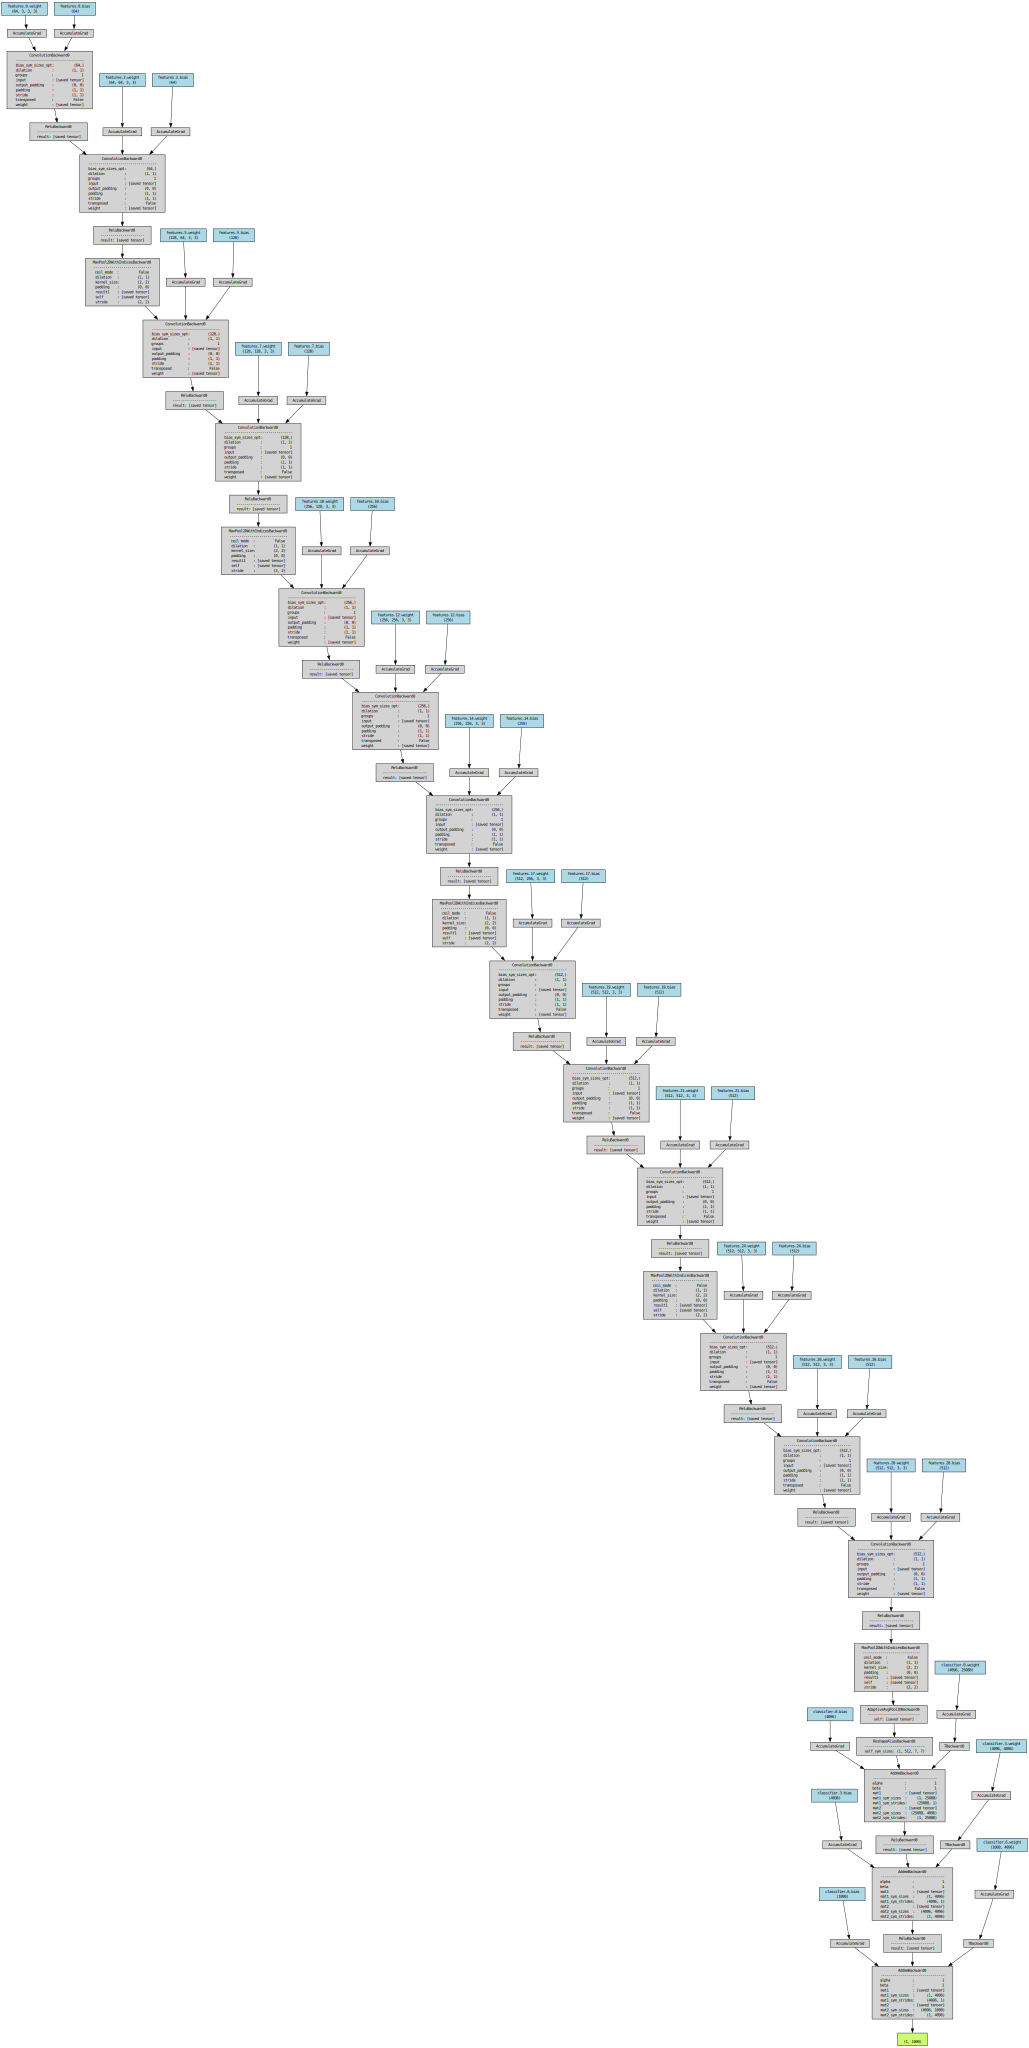

In [4]:
# size:1, channel(RGB):3, height:224, width:224
dummy_input = torch.randn(1, 3, 224, 224)
output = model(dummy_input)
# Visualize the model
dot = torchviz.make_dot(
    output, params=dict(list(model.named_parameters())), show_attrs=True
)
dot

### ÂÖ•ÂäõÁîªÂÉè„ÅÆÂâçÂá¶ÁêÜ„ÇØ„É©„Çπ„Çí‰ΩúÊàê

ÁîªÂÉè„Çµ„Ç§„Ç∫„Çí224x224„Å´„Åô„Çã„Å®„Å®„ÇÇ„Å´„ÄÅILSVRC2012„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çà„ÇäÁÆóÂá∫„Åï„Çå„Å¶„ÅÑ„Çã„ÄÅÂπ≥Âùá(0.485,0.456,0.406)„ÄÅÊ®ôÊ∫ñÂÅèÂ∑Æ(0.229,0.224,0.225)„Åß„ÅÆÊ®ôÊ∫ñÂåñ„ÇíÂâçÂá¶ÁêÜ„Å®„Åó„Å¶ÂÆüË°å„Åô„Çã„ÄÇ

„Åæ„Åü„ÄÅË™≠„ÅøËæº„ÅøÁîªÂÉè„ÅØ„ÄÅBing Copilot„ÅßÂá∫Âäõ„Åó„Åü„Ç¥„Éº„É´„Éá„É≥„É¨„Éà„É™„Éê„Éº„ÅÆÁîªÂÉè„Å®„Åô„Çã„ÄÇ

In [5]:
class BaseTransform:
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose(
            [
                transforms.Resize(resize),  # resize the short side to the given size
                transforms.CenterCrop(resize),  # crop the given size from the center
                transforms.ToTensor(),  # convert the image to Tensor
                transforms.Normalize(
                    mean, std
                ),  # normalize the image with mean and standard deviation
            ]
        )

    def __call__(self, img):
        return self.base_transform(img)

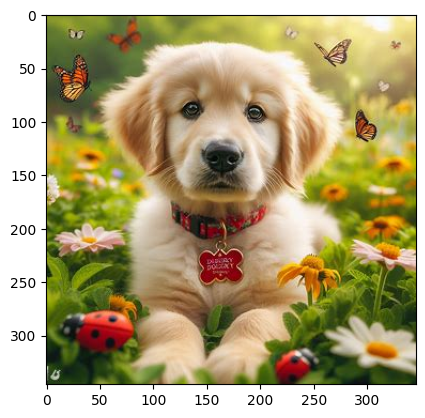

(346, 346)


In [6]:
image_file_path = "data/golden-retriever.jpeg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

print(img.size)

In [7]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
print(img_transformed.shape)
img_transformed

torch.Size([3, 224, 224])


tensor([[[ 0.2282,  0.1939,  0.1597,  ...,  2.1462,  2.1290,  2.1119],
         [ 0.2453,  0.2282,  0.2111,  ...,  2.1804,  2.1633,  2.1119],
         [ 0.2282,  0.2282,  0.2282,  ...,  2.2147,  2.1633,  2.0605],
         ...,
         [-0.8507, -1.1589, -1.4843,  ..., -1.6384, -1.6898, -1.7240],
         [-1.3815, -1.4500, -1.5014,  ..., -1.6898, -1.7583, -1.7925],
         [-1.4329, -1.4843, -1.5185,  ..., -1.6898, -1.7925, -1.8097]],

        [[ 0.6604,  0.6254,  0.5728,  ...,  2.2185,  2.2185,  2.2010],
         [ 0.6779,  0.6429,  0.6254,  ...,  2.2010,  2.2010,  2.1835],
         [ 0.6429,  0.6429,  0.6429,  ...,  2.2185,  2.1660,  2.0784],
         ...,
         [-0.4776, -0.7227, -0.9503,  ..., -1.0728, -1.1253, -1.1954],
         [-1.0378, -1.0028, -0.9503,  ..., -1.1604, -1.2479, -1.2829],
         [-1.0903, -1.0203, -0.9328,  ..., -1.2304, -1.3354, -1.3880]],

        [[-1.1073, -1.1247, -1.1247,  ...,  1.8208,  1.7511,  1.6814],
         [-1.0724, -1.0550, -1.0724,  ...,  1

Ë°®Á§∫Áî®„Å´„ÄÅtranspose„ÅßËª∏„ÇíÂÖ•„ÇåÊõø„Åà„Çã„ÄÇ

„Åæ„Åü„ÄÅÊ®ôÊ∫ñÂåñ„ÇíË°å„Å™„Å£„Å¶„ÅÑ„Çã„Åü„ÇÅ„ÄÅÂÄ§„Åå0~1„ÅÆÁØÑÂõ≤„Å´Âèé„Åæ„Çâ„Å™„ÅÑ„ÇÇ„ÅÆ„ÇÇ„ÅÇ„Çã„Åü„ÇÅ„ÄÅclip„Åß0~1„ÅÆÁØÑÂõ≤„Å´Âèé„ÇÅ„Çã„ÄÇÁµêÊûú„ÄÅÂ§âÊèõÂæå„ÅÆÁîªÂÉè„Å´„ÅØÁôΩ„Å£„ÅΩ„ÅÑÈÉ®ÂàÜ„ÇÑÈªí„Å£„ÅΩ„ÅÑÈÉ®ÂàÜ„ÅåÂ¢ó„Åà„Çã„Åì„Å®„Å´„Å™„Çã„ÄÇ

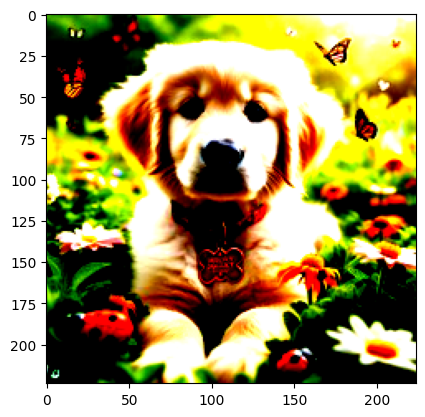

In [8]:
# (channel, height, width) -> (height, width, channel)
img_transposed_show = img_transformed.numpy().transpose((1, 2, 0))
# clip the value to [0, 1]
img_transposed_show = np.clip(img_transposed_show, 0, 1)
plt.imshow(img_transposed_show)
plt.show()

### Âá∫ÂäõÁµêÊûú„Åã„Çâ„É©„Éô„É´„Çí‰∫àÊ∏¨„Åô„Çã„ÅÇ„Å®Âá¶ÁêÜ„ÇØ„É©„Çπ„Çí‰ΩúÊàê

In [9]:
# ILSVRC class labels
class_index = requests.get(
    "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
).json()
# first three of class labels
{key: value for (key, value) in list(class_index.items())[:3]}

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark']}

In [10]:
class ILSVRCPredictor:
    def __init__(self, class_index):
        """
        A class for predicting the maximum label from the output of a model trained on the ILSVRC dataset.

        Args:
            class_index (dict): A dictionary containing the class labels for the ILSVRC dataset.

        Methods:
            predict_max(out): Predicts the maximum label name from the given output tensor.
        """
        self.class_index = class_index

    def predict_max(self, out):
        """
        Predicts the maximum label name from the given output tensor.

        Args:
            out (torch.Tensor): The output tensor from the model.

        Returns:
            str: The predicted label name.
        """
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        return predicted_label_name

### Â≠¶ÁøíÊ∏à„Åø„ÅÆVGG„É¢„Éá„É´„ÅßÊâãÂÖÉ„ÅÆÁîªÂÉè„Çí‰∫àÊ∏¨

In [11]:
predictor = ILSVRCPredictor(class_index)

In [12]:
img_transformed.shape

torch.Size([3, 224, 224])

„É¢„Éá„É´„Å´ÂÖ•Âäõ„Åô„ÇãÈöõ„Å´„ÅØ„ÄÅÊúÄÂàù„ÅÆindex„ÅØ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíÊåá„ÅôÂøÖË¶Å„Åå„ÅÇ„Çã„ÄÇ„Åù„ÅÆ„Åü„ÇÅ„ÄÅ`unsqueeze`(squeeze=Áµû„Çã„ÄÅ„ÅÆÈÄÜ„Å®„ÅÑ„ÅÜ„Åì„Å®„ÅßÊ¨°ÂÖÉ„ÅåÂ¢ó„Åà„Çã„Åì„Å®„Å´„Å™„Çã)„ÇíÈÅ©Áî®„Åô„Çã„ÄÇ„Å°„Å™„Åø„Å´„ÄÅÊõ∏Á±ç„Åß„ÅØ`unsqueeze_`„Çí‰ΩøÁî®„Åó„Å¶„ÅÑ„Çã„Åå„ÄÅ„Åì„Çå„ÅØÂÖÉ„ÅÆ„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÇÇÂ§âÊõ¥„Åô„ÇãÈùûÂèØÈÄÜÊìç‰Ωú„Åß„ÅÇ„Çä„ÄÅ`unsqueeze`(„Ç¢„É≥„ÉÄ„Éº„Çπ„Ç≥„Ç¢„ÅÇ„Çä)„Åß„ÅØ„ÄÅÂÖÉ„ÅÆ„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÇíÁ†¥Â£ä„Åó„Å™„ÅÑ„ÄÇ„Åì„Åì„Åß„ÅØ„ÄÅnotebook„ÅßÂêå„Åò„Çª„É´„Çí‰ΩïÂõûÂÆüË°å„Åó„Å¶„ÇÇÂÆâÂøÉ„Å™`unsqueeze`„ÅÆÊñπ„Çí‰ΩøÁî®„Åô„Çã„Åì„Å®„Å´„Åó„Åü„ÄÇ

In [13]:
inputs = img_transformed.unsqueeze(0)
inputs.shape

torch.Size([1, 3, 224, 224])

Â≠¶ÁøíÊ∏à„Åø„ÅÆ„É¢„Éá„É´„Åß„ÇØ„É©„Çπ„Çí‰∫àÊÉ≥„ÄÇÂêÑ„ÇØ„É©„Çπ„Å´ÂØæÂøú„Åô„ÇãÂÄ§„ÅåÂá∫Âäõ„Åï„Çå„ÄÅÊúÄÂ§ßÂÄ§„ÅåÊúÄ„ÇÇÂèØËÉΩÊÄß„ÅÆÈ´ò„ÅÑÊé®Ê∏¨ÁµêÊûú„Å®„Å™„Çã„ÄÇ„Å™„Åä„ÄÅVGG16„ÅØÂàÜÈ°ûÂïèÈ°å„ÇíËß£„Åè„É¢„Éá„É´„Å†„Åå„ÄÅ„É¢„Éá„É´„ÅÆÂõ≥„ÇíË¶ã„Å¶ÂàÜ„Åã„ÇãÈÄö„Çä„ÄÅsoftmaxÈñ¢Êï∞„ÅåÈÅ©Áî®„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑ„ÄÇ„Åó„Åü„Åå„Å£„Å¶„ÄÅÂá∫ÂäõÂÄ§„ÅØÂÆüÊï∞„ÇíÂèñ„Çã(softmaxÈñ¢Êï∞„ÅåÈÅ©Áî®„Åï„Çå„Å¶„ÅÑ„Çå„Å∞0~1„Å´„Å™„Çã„ÅØ„Åö)„ÄÇ

In [14]:
out = model(inputs)
print(out.shape)
out[0][:3]

torch.Size([1, 1000])


tensor([-1.1167, -0.6101, -3.0988], grad_fn=<SliceBackward0>)

copilot„Åß‰ΩúÊàê„Åó„ÅüÁîªÂÉè„Å†„Å£„Åü„Åå„ÄÅ„Å°„ÇÉ„Çì„Å®„Ç¥„Éº„É´„Éá„É≥„É¨„Éà„É™„Éê„Éº„Å®„Åó„Å¶Âá∫Âäõ„Åï„Çå„Åüüòå

In [15]:
predictor.predict_max(out[0])

'golden_retriever'